# Heartbeats_classifier.py
A professional, production-style Python script to build a normal vs. abnormal 
ECG heartbeat classifier using an MIT-BIH–derived CSV dataset.

Author: Gtechnologies pty ltd
Date: 2025-02-16


In [1]:
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader

csv=r"C:\Users\user\OneDrive\Desktop\projects\ecg_images\dataset\mitbih_train.csv"
test_size=0.2
random_state=42
batch_size=64
epoch=5


code for importing the data

In [2]:
def load_preprocess(csv: str):
    df=pd.read_csv(csv,header=None)
    print(f"Data loaded: shape={df.shape} from {csv}")

    X=df.iloc[:,:-1].values
    y_multi=df.iloc[:,-1].values

    y_binary=np.where(y_multi == 0,0,1)
    
    return X , y_binary

code for splitting the data

In [3]:
def split_data(X,y,test_size=test_size):
    return train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=random_state,
        stratify=y

    )

In [4]:
X,y=load_preprocess(csv)
X_train,X_test,y_train,y_test=split_data(X,y)
print(f"Train shape : {X_train.shape}, Test shape : {X_test.shape}")

Data loaded: shape=(87554, 188) from C:\Users\user\OneDrive\Desktop\projects\ecg_images\dataset\mitbih_train.csv
Train shape : (70043, 187), Test shape : (17511, 187)


In [5]:
count=0
for i in range(len(y_test)):
    if y_test[i] ==  1:
        count=count+1


Balacing the dataaset 

In [6]:
ros = RandomOverSampler(random_state=random_state)
X_train_bal,y_train_bal=ros.fit_resample(X_train,y_train)
print("After over sampling")
print(f"x_train_bal shape:{X_train_bal}")


After over sampling
x_train_bal shape:[[1.         0.90552998 0.68894011 ... 0.         0.         0.        ]
 [1.         0.85714287 0.52709359 ... 0.         0.         0.        ]
 [1.         0.93597561 0.5625     ... 0.         0.         0.        ]
 ...
 [1.         0.95012164 0.90145987 ... 0.         0.         0.        ]
 [0.         0.04       0.1        ... 0.         0.         0.        ]
 [1.         0.890625   0.59375    ... 0.         0.         0.        ]]


Random forest classifier from scartch 

In [7]:
rf_clf=RandomForestClassifier(n_estimators=100,max_depth=15,random_state=random_state)
rf_clf.fit(X_train_bal,y_train_bal)
print("Random forest classifier executed")


Random forest classifier executed


evualting rf 


In [8]:
y_pred_rf=rf_clf.predict(X_test)
cm_rf=confusion_matrix(y_test,y_pred_rf)
report_rf=classification_report(y_test,y_pred_rf,target_names=['Normal','Abormal'])

print("=== Random forest evaluation ===")
print("confusion matrix:\n")
print(f"{cm_rf} \n")
print("Classification report \n ")
print(report_rf)


=== Random forest evaluation ===
confusion matrix:

[[14425    69]
 [  293  2724]] 

Classification report 
 
              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99     14494
     Abormal       0.98      0.90      0.94      3017

    accuracy                           0.98     17511
   macro avg       0.98      0.95      0.96     17511
weighted avg       0.98      0.98      0.98     17511



In [18]:
report_rf=classification_report(y_test,y_pred_rf,target_names=['Normal','Abormal'],output_dict=True)

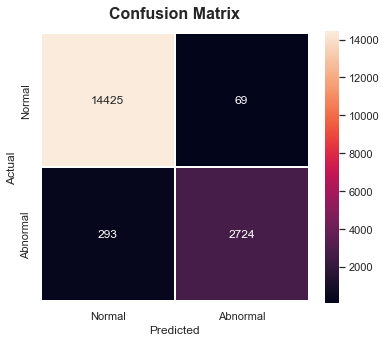

In [14]:
plt.figure(figsize=(6, 5))
sns.set(style="whitegrid")
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="rocket", linewidths=1.5, square=True, cbar=True,
            xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.title("Confusion Matrix", fontsize=16, pad=15, weight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show()

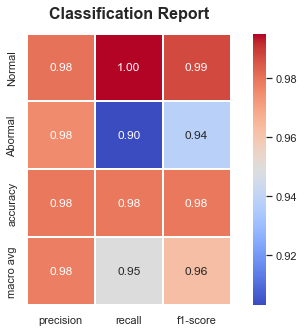

In [19]:
report_df=pd.DataFrame(report_rf).transpose()
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=1.5, cbar=True,
            fmt=".2f", square=True, linecolor='white')
plt.title("Classification Report", fontsize=16, pad=15, weight='bold')
plt.show()